# Forest carbon flux model

In this notebook we build a simple forest carbon flux model to estimate the timing of carbon emissions and removals in response to a harvest event.  The model ignores soil carbon and carbon transfers from products to second generation products or waste (landfill/energy) which could be added in the future.

In [8]:
from collections import namedtuple
from dataclasses import dataclass

import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors as colors

from forest_carbon import CarbonFlux, CarbonModel

In [9]:
forest_regrowth = CarbonFlux(40, 1.7, 1000, 'forest regrowth', 1, emission=False)
decay = CarbonFlux(20, 2, 1000, 'biomass decay', 0.5)
energy = CarbonFlux(1, 1.05, 1000, 'energy', 0.5*0.1)
short_lived = CarbonFlux(20, 1.5, 1000, 'short-lived products', 0.5*0.4)
long_lived = CarbonFlux(60, 1.5, 1000, 'long-lived products', 0.5*0.5)

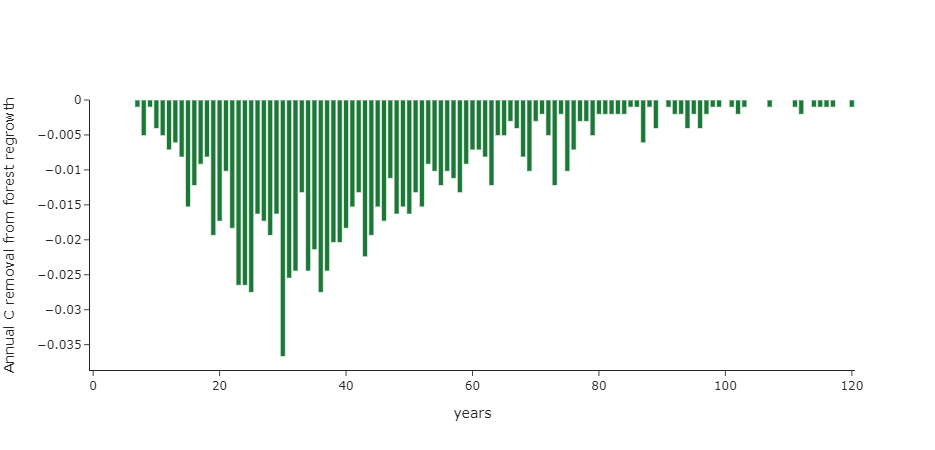

In [10]:
forest_regrowth.plot_pdf()

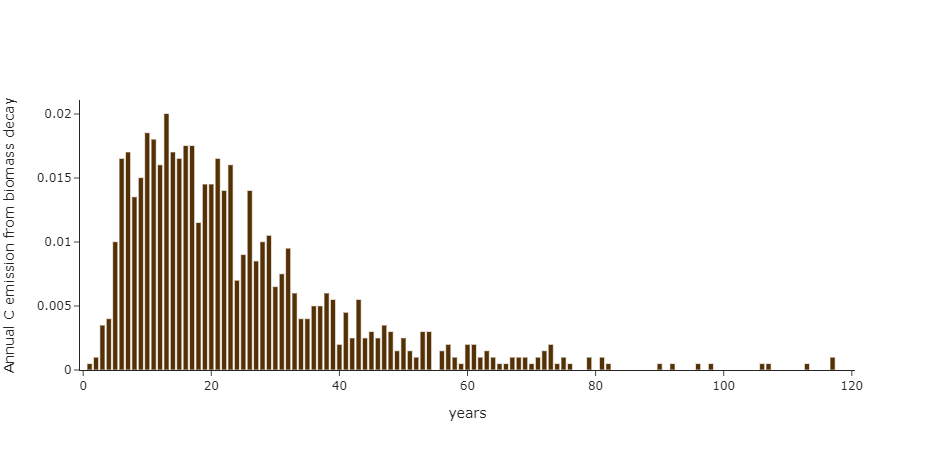

In [11]:
decay.plot_pdf()

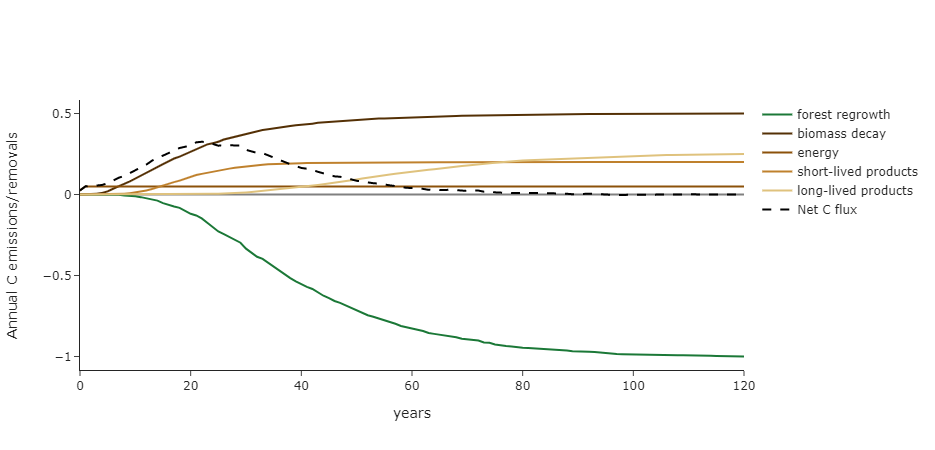

In [12]:
#parameters
data = {
    'forest_regrowth': forest_regrowth,
    'biomass_decay': decay,
    'energy': energy,
    'short_lived_products': short_lived,
    'long_lived_products': long_lived}

carbon_model = CarbonModel(data, 'harvest')
carbon_model.plot_carbon_balance()

In [19]:
from climate_metrics import AGWP_CO2

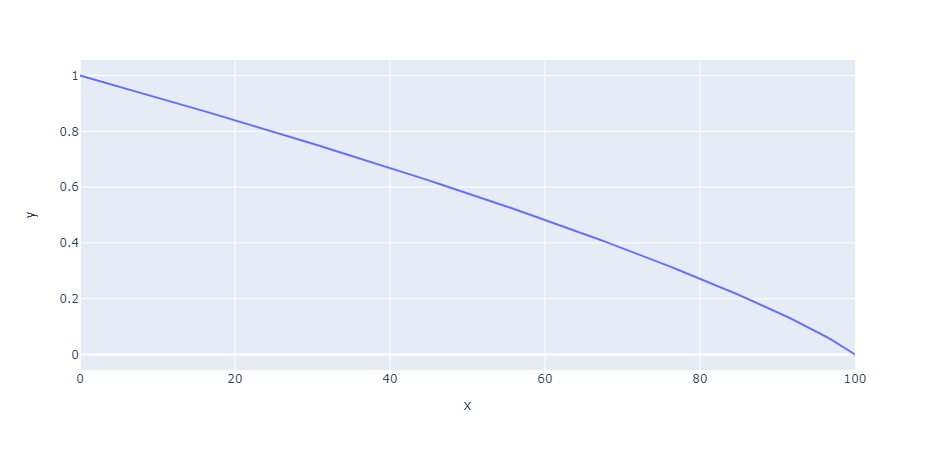

In [21]:
AGWP = AGWP_CO2(np.arange(0, 101))
dynamic_GWP = np.flip(AGWP[0:101])/AGWP_CO2(100)
px.line(y=dynamic_GWP)

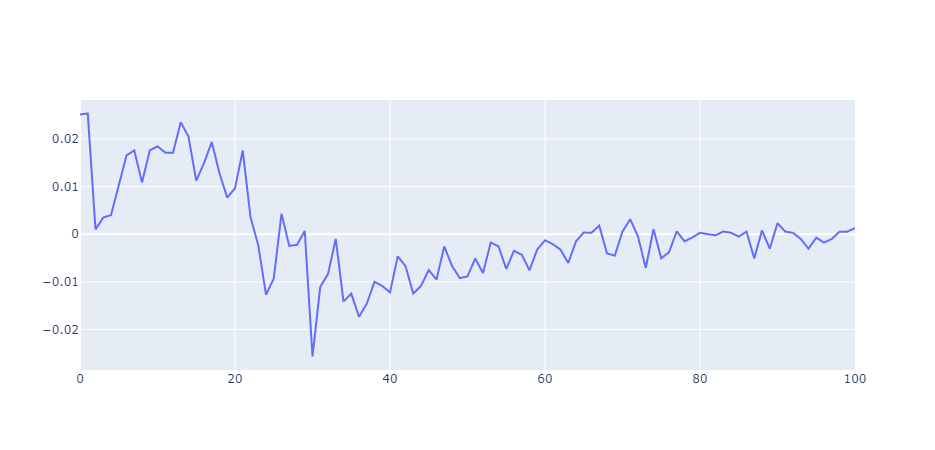

In [22]:
AGWP = AGWP_CO2(np.arange(0, 121))
net_annual_carbon_flux = carbon_model.net_annual_carbon_flux
fig = go.Figure()
fig.add_trace(go.Scatter(y=net_annual_carbon_flux[0:101], name='raw'))
fig

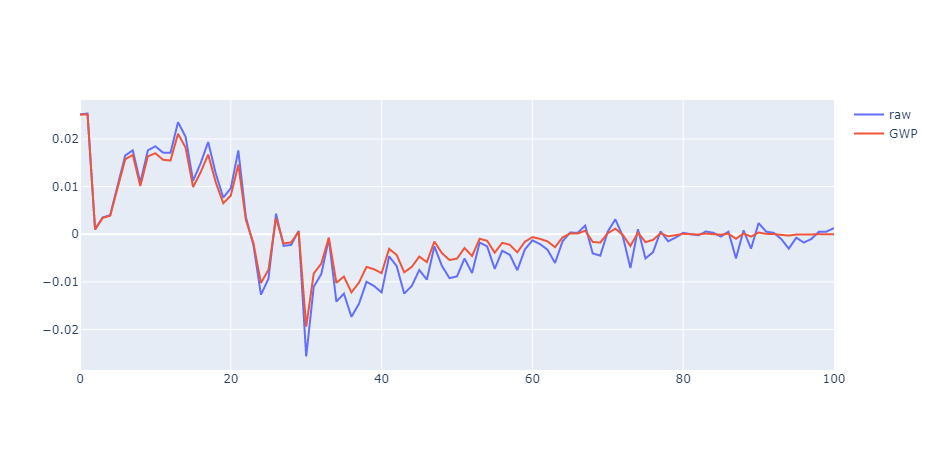

In [23]:
# dynamic GWP based on Cherubini and Peters (2011):  https://onlinelibrary.wiley.com/doi/full/10.1111/j.1757-1707.2011.01102.x
# implementation of convolution (pasing GWP over annual fluxes)
dynamic_AGWP_100 = np.flip(AGWP[0:101]) * net_annual_carbon_flux[0:101]
dynamic_GWP_100 = dynamic_AGWP_100 / AGWP_CO2(100)
fig.add_trace(go.Scatter(y=dynamic_GWP_100, name='GWP'))


In [24]:
np.sum(dynamic_GWP_100)

0.09366433934174853